

```
# Isto está formatado como código
```

Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [2]:
NAME = ""
COLLABORATORS = "Kleber Vasconcelos"

---

In [3]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

## Introduction

In Python, an image can be represented as a matrix or a NumPy array. Each pixel corresponds to an element in the matrix. You can manipulate the image by accessing and modifying the matrix elements using array manipulation libraries like NumPy. This allows for efficient operations such as cropping, flipping, resizing, filtering, and more. Treating an image as a matrix provides flexibility and access to a wide range of tools for image processing tasks in Python.

For more details, refer to:

[OpenCV Getting and Setting Pixels](https://pyimagesearch.com/2021/01/20/opencv-getting-and-setting-pixels/)

# Crop and flip an image using Numpy array indexing.

In [4]:
def crop(img, x1, x2, y1, y2):
    '''
    Crop an image using NumPy array indexing.
    Parameters:
    image (numpy.ndarray): The input image as a NumPy array.
    x1 (int): The x-coordinate of the top-left corner of the cropping area.
    y1 (int): The y-coordinate of the top-left corner of the cropping area.
    x2 (int): The x-coordinate of the bottom-right corner of the cropping area.
    y2 (int): The y-coordinate of the bottom-right corner of the cropping area.

    Returns:
    numpy.ndarray: The cropped image as a NumPy array.
    '''
    # YOUR CODE HERE
    rows, cols, channels = img.shape
    new_img = np.ones((x2-x1, y2-y1, channels), dtype=np.uint8)

    for i in range(rows):
        if i < x2 and i > x1:
            for j in range(cols):
                if j < y2 and j > y1:
                    #select the original image part and create the cropped image
                    new_img[j-y1-1][i-x1-1] = img[j][i]
  
    cropped_image = new_img
    return cropped_image


In [5]:
def ConvertColor(img):
    return  cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

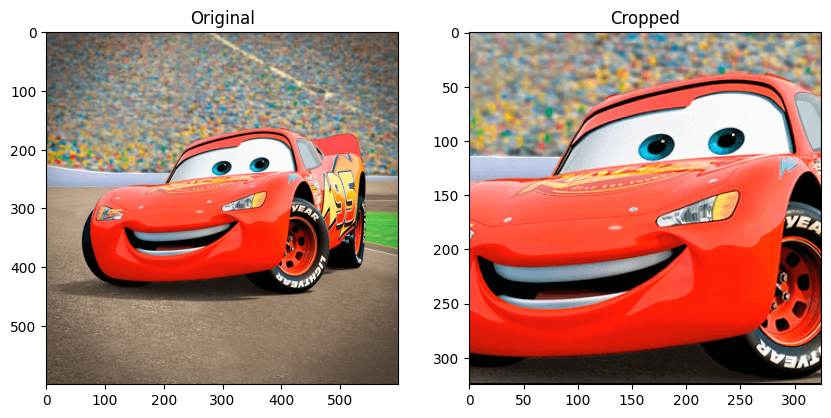

In [74]:
IMG_PATH = '../images/relampago.png'
MARIO_IMG_PATH = '../images/mario.png'


img = cv2.imread(IMG_PATH)
img = ConvertColor(img)

img2 = cv2.imread(MARIO_IMG_PATH)
img2 = ConvertColor(img2)

img_ = crop(img, 125, 450, 125, 450)
 
# Plot original and cropped image
fig, (ax1, ax2) = plt.subplots(1, 2)
#set the size of plot
fig.set_size_inches(10, 5)
ax1.imshow(img)
ax1.set_title('Original')
ax2.imshow(img_) 
ax2.set_title('Cropped')
plt.show()

In [7]:
def flip(img, axis):
    '''
    Flip an image using NumPy array indexing.

    Parameters:
    image (numpy.ndarray): The input image as a NumPy array.
    axis (int): The axis along which to flip the image.
                0: Flip vertically (upside down).
                1: Flip horizontally (mirror image).

    Returns:
    numpy.ndarray: The flipped image as a NumPy array.
    '''
     # YOUR CODE HERE
    flipped_image = img.copy()
    if axis == 0:
        flipped_image = img[::-1, :]
    elif axis == 1:
        flipped_image = img[:, ::-1]
    return flipped_image

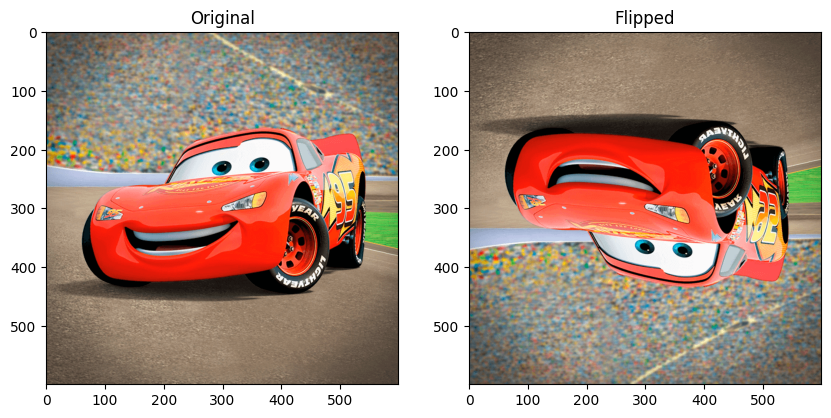

In [8]:
img_ = flip(img, 0)

# Plot original and cropped image
fig, (ax1, ax2) = plt.subplots(1, 2)
#set the size of plot
fig.set_size_inches(10, 5)
ax1.imshow(img)
ax1.set_title('Original')
ax2.imshow(img_) 
ax2.set_title('Flipped')
plt.show()

# Implement image translation using Numpy and OpenCV.

In [9]:
def translate_image(img, dx, dy):
    '''
    Parameters:
    image (numpy.ndarray): The input image as a NumPy array.
    dx (int): The translation amount in the x-direction. Positive values translate to the right.
    dy (int): The translation amount in the y-direction. Positive values translate down

    Returns:
    numpy.ndarray: The translated image as a NumPy array.
    '''

    # YOUR CODE HERE
    # Calcula as dimensões da nova imagem considerando o deslocamento
    rows, cols = img.shape[:2]
    new_rows = rows + abs(dy)
    new_cols = cols + abs(dx)

    # Cria uma nova matriz preenchida com zeros
    translated_image = np.zeros((new_rows, new_cols, 3), dtype=np.uint8)

    # Calcula as posições de início na nova imagem
    start_row = max(0, dy)
    start_col = max(0, dx)

    # Calcula as posições de fim na nova imagem
    end_row = min(rows + dy, new_rows)
    end_col = min(cols + dx, new_cols)

    # Copia a região da imagem original para a posição correta na nova imagem
    translated_image[start_row:end_row, start_col:end_col] = img[max(-dy, 0):rows+max(-dy, 0), max(-dx, 0):cols+max(-dx, 0)]

    return translated_image

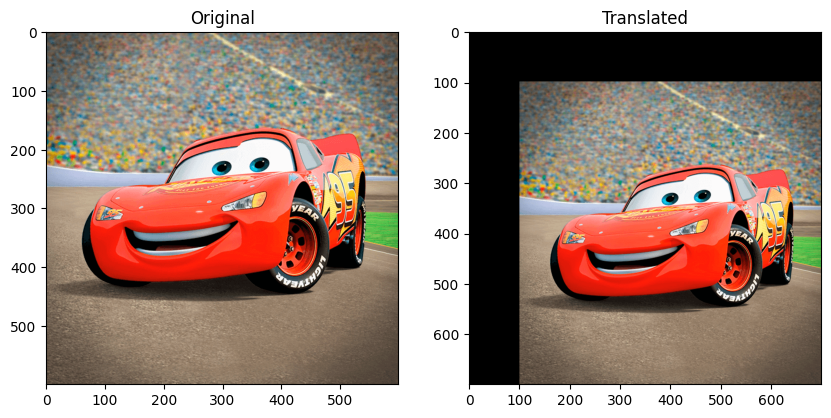

In [10]:
img_ = translate_image(img, 100, 100)

# Plot original and translated image
fig, (ax1, ax2) = plt.subplots(1, 2)
#set the size of plot
fig.set_size_inches(10, 5)
ax1.imshow(img)
ax1.set_title('Original')
ax2.imshow(img_) 
ax2.set_title('Translated')
plt.show()

# Implement image rotation around its center using NumPy and OpenCV.

In [11]:
def rotate_image(img, theta):
    """
    Rotate an image using NumPy and OpenCV.

    Parameters:
    image (numpy.ndarray): The input image as a NumPy array.
    angle (float): The rotation angle in degrees.

    Returns:
    numpy.ndarray: The rotated image as a NumPy array.
    """

    # YOUR CODE HERE
    # Get image center
    center = tuple(np.array(img.shape[1::-1]) / 2)
    # Define rotation matrix
    rot_mat = cv2.getRotationMatrix2D(center, theta, 1.0)
    # Perform rotation
    rotated_image = cv2.warpAffine(img, rot_mat, img.shape[1::-1], flags=cv2.INTER_LINEAR)
    return rotated_image
    

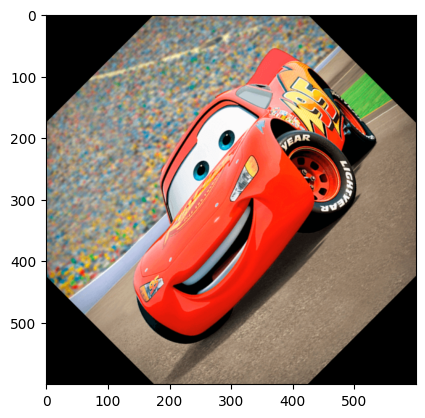

In [71]:
theta = 45
# Rotate the image
rotated_image = rotate_image(img, theta)
plt.imshow(rotated_image)

# Display the original and rotated images
# cv2.imshow('Original Image', img)
# cv2.imshow('Rotated Image', rotated_image)
# cv2.waitKey(0)
# cv2.destroyAllWindows(2000)

# Implement image resizing using OpenCV.

In [13]:
def resize_image(image, scale):
    """
    Resize an image using OpenCV.

    Parameters:
    image (numpy.ndarray): The input image as a NumPy array.
    scale (float): The scaling factor to resize the image.

    Returns:
    numpy.ndarray: The resized image as a NumPy array.
    """
    #Make sure your scale is greather than zero.
    # YOUR CODE HERE
    width = int(image.shape[1] * scale/100)
    height = int(image.shape[0] * scale/100)
    dimensions = (width, height)

    #resizing
    resized_image = cv2.resize(image, dimensions, interpolation = cv2.INTER_AREA)
    return resized_image

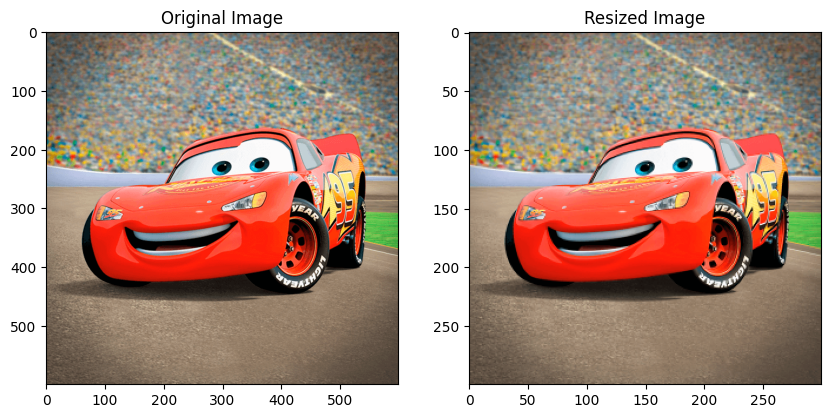

In [23]:
scale = 50
resized_image = resize_image(img, scale)

fig , (ax1, ax2) = plt.subplots(1,2, figsize=(10,10))

#Matplotlib plot
ax1.set_title("Original Image")
ax1.imshow(img)
ax2.set_title("Resized Image")
ax2.imshow(resized_image)
plt.show()

#CV2 plot
# cv2.imshow("Resized Image", resized_image)
# cv2.waitKey(2000)
# cv2.destroyAllWindows()

# Implement bitwise operations: AND, OR, XOR.

In [32]:
def bitwise_and(image1, image2):
    """
    Perform a bitwise AND operation on two images using NumPy.

    Parameters:
    image1 (numpy.ndarray): The first input image as a NumPy array.
    image2 (numpy.ndarray): The second input image as a NumPy array.

    Returns:
    numpy.ndarray: The result of the bitwise AND operation as a NumPy array.
    """
    # YOUR CODE HERE
    result = cv2.bitwise_and(image1, image2)
    return result

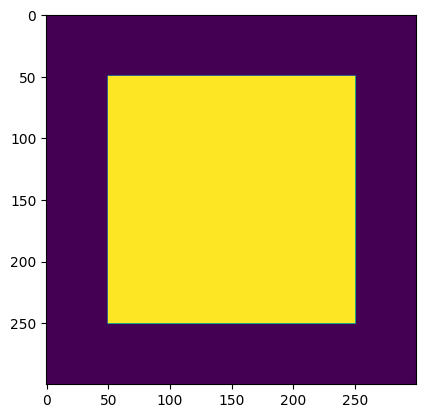

In [38]:
# Square
square = np.zeros((300,300), np.uint8)
cv2.rectangle(square, (50,50), (250,250), 255, -2)
plt.imshow(square)
plt.show()

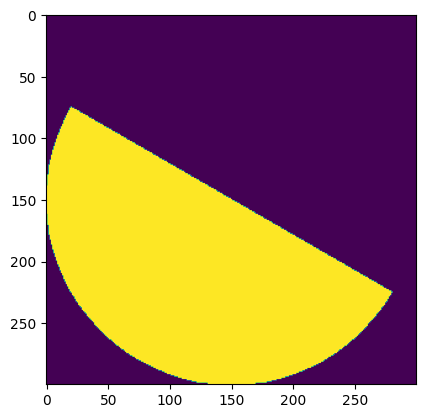

In [39]:
#Ellipse
ellipse = np.zeros((300,300), np.uint8)
cv2.ellipse(ellipse, (150,150), (150,150), 30, 0, 180, 255, -1)
plt.imshow(ellipse)
plt.show()

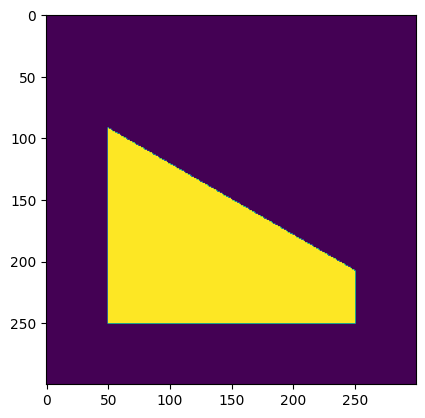

In [41]:
#And operation
_and = cv2.bitwise_and(square, ellipse)
plt.imshow(_and)
plt.show()

In [42]:
def bitwise_or(image1, image2):
    """
    Perform a bitwise OR operation on two images using NumPy.

    Parameters:
    image1 (numpy.ndarray): The first input image as a NumPy array.
    image2 (numpy.ndarray): The second input image as a NumPy array.

    Returns:
    numpy.ndarray: The result of the bitwise OR operation as a NumPy array.
    """
    # YOUR CODE HERE
    result = cv2.bitwise_or(image1, image2)
    return result

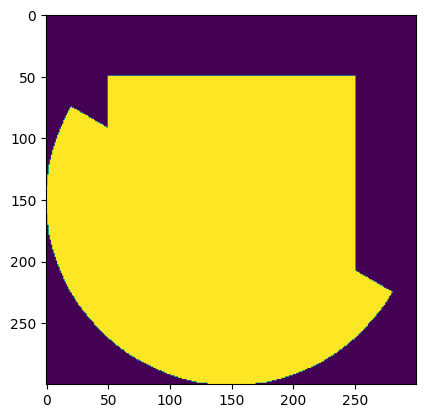

In [43]:
_or = bitwise_or(square, ellipse)
plt.imshow(_or)
plt.show()

In [45]:
def bitwise_xor(image1, image2):
    """
    Perform a bitwise XOR (exclusive OR) operation on two images using NumPy.

    Parameters:
    image1 (numpy.ndarray): The first input image as a NumPy array.
    image2 (numpy.ndarray): The second input image as a NumPy array.

    Returns:
    numpy.ndarray: The result of the bitwise XOR operation as a NumPy array.
    """
    # YOUR CODE HERE
    result = cv2.bitwise_xor(image1, image2)
    return result

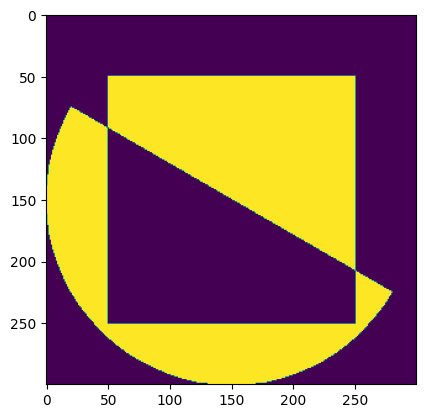

In [49]:
xor = bitwise_xor(square, ellipse)
plt.imshow(xor)
plt.show()

# Implement the "mask" operation, where a third image 'h' contains only a Region of Interest (ROI -- defined by the second image mask 'g') obtained from the input image 'f'. Note that this Region can be of any shape.

Masking is a technique used in Image Processing to isolate and extract the Region of Interest (ROI), which refers to the specific part of an image that is of interest or relevance for analysis.
Bitwise operations are commonly employed for masking as they enable us to selectively retain or discard specific portions of the image. By using bitwise operations, we can efficiently exclude the areas of the image that are not required, focusing only on the desired region for further processing or analysis.

Masking involves three steps:
* Creating a black mask canvas with the same dimensions as the original image.
* Modifying the mask by drawing a shape or figure of interest in white color.
* Applying the bitwise OR operation to combine the modified mask with the original image.

These steps enable us to selectively include or exclude specific regions of the image based on the defined mask.

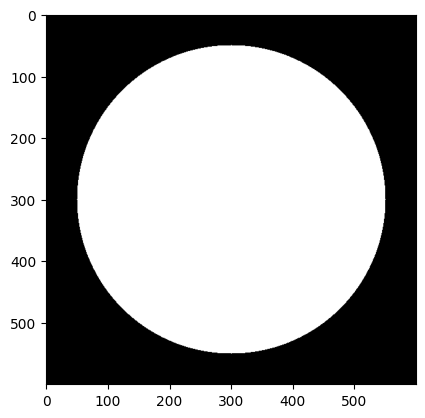

In [68]:
# Create a blank image with a white background
image = np.ones((600, 600, 3), dtype=np.uint8) * 255

# Create a black mask canvas with the same dimensions as the original image
mask = np.zeros((600, 600), dtype=np.uint8)

# Draw a shape or figure of interest in white color on the mask
# For example, let's draw a white circle
x, y = 300, 300
radius = 250
cv2.circle(mask, (x, y), radius, 255, -1)

# Apply the bitwise OR operation to combine the modified mask with the original image
masked_image = cv2.bitwise_or(image, image, mask=mask)

# Display the masked image
plt.imshow(masked_image)
plt.show()